### Functions to compute model ACF and SF of CARMA processes

<br>**Author(s):** Weixiang Yu
<br>**Last run:** 10-30-20
<br>**Short description:** Model ACF and SF for CARMA

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys
%matplotlib inline

# use mpl style on github
mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/project_template'
            '/master/%7B%7Bcookiecutter.project_name%7D%7D/src/vis/mpl/yu_basic.rc')

pd.set_option('display.max_columns', 999)

In [3]:
from agntk.carma.CARMATerm import *
from agntk.lc.carma import *
from celerite import GP
import celerite

### Model ACF (autocorrelation function)

#### DRW

In [18]:
amp = 0.25
tau = 400
drw = DRW_term(np.log(amp), np.log(tau))

In [29]:
def drw_acf(tau):
    a0 = 1/tau

    def acf(lag):
        return np.exp(-a0*lag)
    return acf

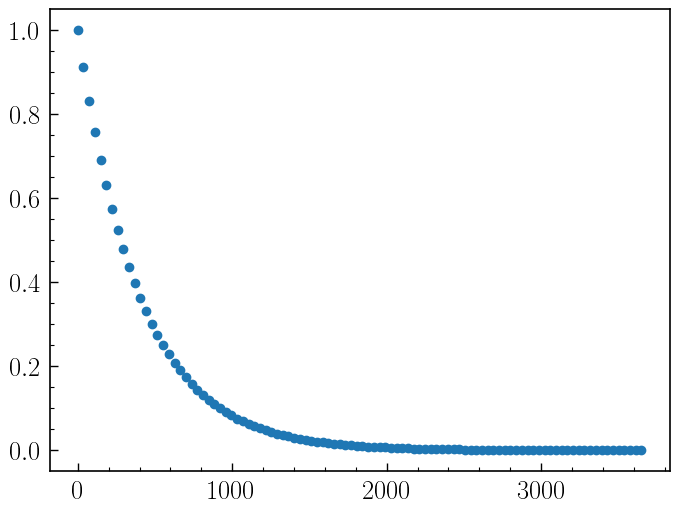

In [30]:
t1 = np.linspace(0, 3650, 100)
plt.scatter(t1, drw_acf(tau)(t1))

#### CARMA 

In [86]:
def carma_acf(arparams, maparams):
    
    autocorr = acf(arparams, maparams)
    roots = np.roots(np.append([1], arparams))
    gpTerm = CARMA_term(np.log(arparams), np.log(maparams))
    
    def autocorr_func(lag):
        R = 0
        for i, r in enumerate(roots):
            R += autocorr[i]*np.exp(r*lag)

        return R/gpTerm.get_rms_amp()**2
    
    return autocorr_func

In [87]:
dho2 = CARMA_term(np.log([0.03939692, 0.0027941]), np.log([0.0046724, 0.0156982]))
arpars = np.exp(dho2.parameter_vector[:2])
mapars = np.exp(dho2.parameter_vector[2:])

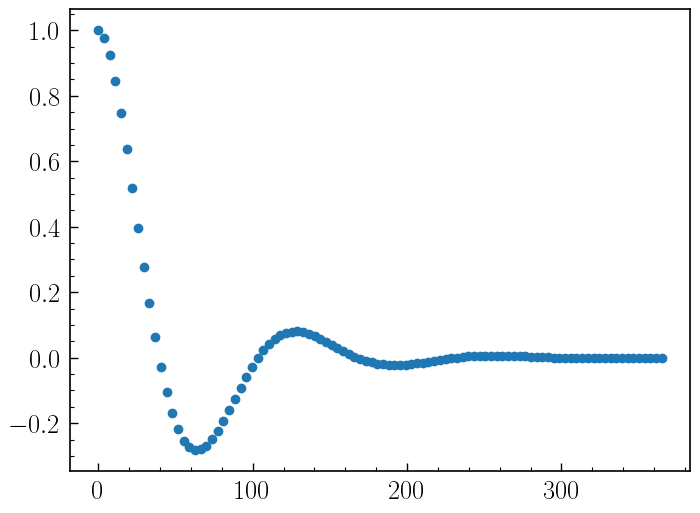

In [88]:
t1 = np.linspace(0, 365, 100)
plt.scatter(t1, carma_acf(arpars, mapars)(t1))

### Model SF (Structure Function)

#### DRW

In [91]:
def drw_sf(amp, tau):

    def sf(lag):
        return np.sqrt(amp**2*(1-drw_acf(tau)(lag)))

    return sf

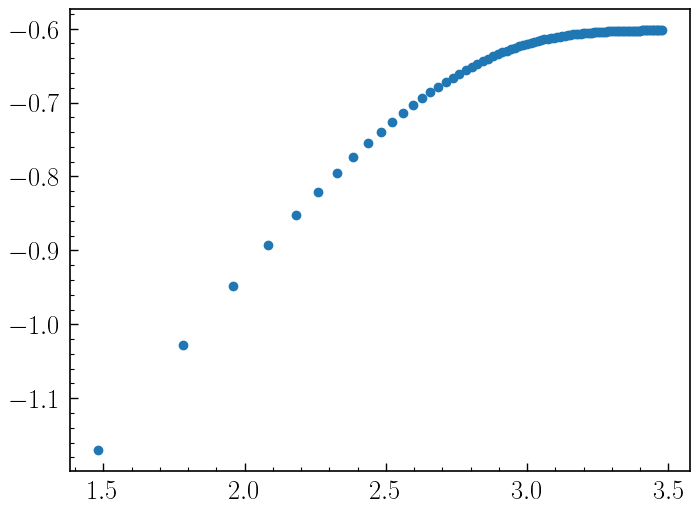

In [98]:
t1 = np.linspace(0, 3000, 100)
plt.scatter(np.log10(t1), np.log10(drw_sf(amp, tau)(t1)))

#### CARMA

In [101]:
def carma_sf(arparams, maparams):
    gpTerm = CARMA_term(np.log(arparams), np.log(maparams))
    amp2 = gpTerm.get_rms_amp()**2

    def sf(lag):
        return np.sqrt(amp2*(1-carma_acf(arparams, maparams)(lag)))

    return sf    

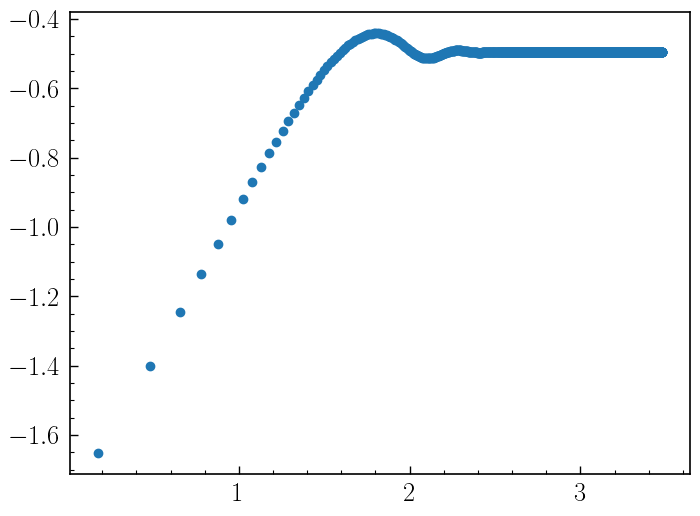

In [105]:
t1 = np.linspace(0, 3000, 2000)
plt.scatter(np.log10(t1), np.log10(carma_sf(arpars, mapars)(t1)))